### Basis of the Automation of Shortcut Column

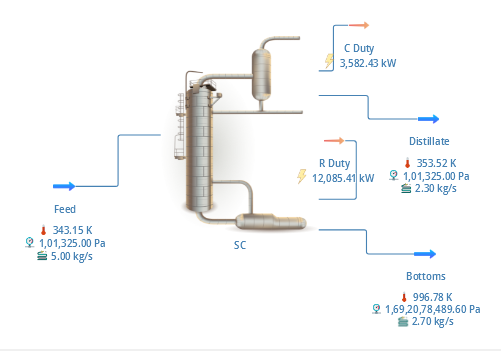

In [60]:
# Import the display function from the IPython.display module
from IPython.display import display

# Import the Image class from the PIL module
from PIL import Image

# Open an image file using the Image class and assign it to the variable Basis_image
Basis_image = Image.open(r"D:\08 Linked In\03 DWSim Automation\04 Automation of Column\04 Automation of Column Basis.png")

# Display the Basis_image using the display function from IPython.display
display(Basis_image)

In [61]:
# Import the clr module, which provides the .NET Common Language Runtime (CLR) functionality for Python
import clr

# Import the System.IO module, which provides access to the input/output (I/O) operations on files and directories
import System.IO

# Import the System module, which provides access to common types and functionality in the .NET framework
import System

# Import the pythoncom module, which provides Python bindings for COM (Component Object Model) services
import pythoncom

# Import the Directory, Path, and File classes from the System.IO module, which provide methods for working with directories and files
from System.IO import Directory, Path, File

# Import the String and Environment classes from the System module, which provide methods for working with strings and environment variables
from System import String, Environment

# Initialize the COM components
pythoncom.CoInitialize()

# Set the path to the DWSIM installation folder
dwSimPath = r"C:\Users\viraj\AppData\Local\DWSIM\\"

# Add references to the DWSIM libraries using the clr module
# The AddReference method is used to add a reference to a .NET assembly
# The path to the assembly is constructed using the dwSimPath variable and the name of the assembly file
# Each assembly provides a specific set of functionality for DWSIM
clr.AddReference(dwSimPath + "CapeOpen.dll")
clr.AddReference(dwSimPath + "DWSIM.Automation.dll")
clr.AddReference(dwSimPath + "DWSIM.Interfaces.dll")
clr.AddReference(dwSimPath + "DWSIM.GlobalSettings.dll")
clr.AddReference(dwSimPath + "DWSIM.SharedClasses.dll")
clr.AddReference(dwSimPath + "DWSIM.Thermodynamics.dll")
clr.AddReference(dwSimPath + "DWSIM.UnitOperations.dll")
clr.AddReference(dwSimPath + "DWSIM.Inspector.dll")
clr.AddReference(dwSimPath + "System.Buffers.dll")

# Import specific classes from the DWSIM libraries using the "from...import" syntax
# The classes are used in the subsequent code to access specific functionality provided by DWSIM
from DWSIM.Interfaces.Enums.GraphicObjects import ObjectType
from DWSIM.Thermodynamics import Streams, PropertyPackages
from DWSIM.UnitOperations import UnitOperations
from DWSIM.Automation import Automation3
from DWSIM.GlobalSettings import Settings

# Set the current directory to the DWSIM installation folder using the Directory class from the System.IO module
# This is necessary so that the DWSIM libraries can be located and imported correctly
Directory.SetCurrentDirectory(dwSimPath)

In [62]:
# Create an instance of the Automation3 class from the DWSIM.Automation module
# This class provides methods for automating tasks in DWSIM, such as creating and manipulating flowsheets
interf = Automation3()

In [63]:
# Set the file path of an existing DWSIM flowsheet to be loaded using the Path.Combine method from the System.IO module
# The flowsheet file path is constructed using the Environment.GetFolderPath method to obtain the path to the desktop folder and the relative path to the flowsheet file
fileNameToLoad = Path.Combine(Environment.GetFolderPath(Environment.SpecialFolder.Desktop), r"D:\08 Linked In\03 DWSim Automation\04 Automation of Column\04 Distillation Column.dwxmz")

# Load the DWSIM flowsheet using the LoadFlowsheet method of the Automation3 class
# The method takes a single argument, which is the file path of the flowsheet to be loaded
# The method returns a Simulation object that represents the loaded flowsheet
sim = interf.LoadFlowsheet(fileNameToLoad)

### Calling Distillation Column as a object

In [64]:
SC = sim.GetObject("SC")
SC = SC.GetAsObject()

In [65]:
print(SC.GetDisplayName())
print(SC.get_Calculated())
print(SC.m_lightkey)
print(SC.m_heavykey)
print(SC.m_lightkeymolarfrac)
print(SC.m_heavykeymolarfrac)
print(SC.m_refluxratio)
print(SC.m_condenserpressure)
print(SC.m_boilerpressure)
print(SC.m_Rmin)
print(SC.m_Nmin)
print(SC.m_N)
print(SC.ofs)
print(SC.L_)
print(SC.L)
print(SC.V_)
print(SC.V)
print(SC.m_Qc)
print(SC.m_Qb)

Shortcut Column
True
Benzene
Toluene
0.01
0.01
3.0
101325.0
1692078489.6
1.1136257403771368
9.154330322895255
12.725343460003318
6.362671730001659
146.84264524220725
88.10558714532435
117.47411619376581
117.4741161937658
3582.430627479232
12085.407125375259


### Automation of Distillation for a range of flow rates

In [66]:
Feed = sim.GetObject("Feed")
Feed = Feed.GetAsObject()

In [73]:
print(Feed.GetTemperature())
print(Feed.GetPressure())
print(Feed.GetMassFlow())

343.15
101325.0
11.0


In [68]:
from tabulate import tabulate

# Set the initial mass flow rate
Feed_mass_flow = float(input("Enter the initial mass flow rate: "))

# Set the solver mode to use the default solver
Settings.SolverMode = 0

# Create an empty list to store the results
results = []

# Iterate 10 times, increasing the mass flow rate by 1 kg/s each time
for i in range(10):
    # Set the new mass flow rate of the inlet stream
    Feed.SetMassFlow(Feed_mass_flow)
    
    # Calculate the flowsheet
    errors = interf.CalculateFlowsheet2(sim)
    
    # Get the new flash spec and pressure
    Mass_Flow_Feed = Feed.GetMassFlow()
    Refluxratio = SC.m_refluxratio
    Actual_Number_of_Stages = SC.m_N
    Optimal_Feed_Stage = SC.m_Nmin
    Stripping_Liquid = SC.L_
    Rectify_Liquid = SC.L
    Stripping_Vapor = SC.V_
    Rectify_Vapor = SC.V
    Condenser_Duty = SC.m_Qc
    Reboiler_Duty = SC.m_Qb

    # Append the results to the list
    results.append([Feed_mass_flow, Refluxratio, Actual_Number_of_Stages, Optimal_Feed_Stage, Stripping_Liquid, Stripping_Vapor, Rectify_Liquid, Rectify_Vapor, Condenser_Duty, Reboiler_Duty])

    # Increase the mass flow rate by 1 kg/s for the next iteration
    Feed_mass_flow += 1.0

# Define the headers for the table
headers = ["Feed mass flow", "Reflux Ratio", "Actual Number of Stages", "Optimal Feed Stage", "Stripping Liquid","Stripping Vapor", "Rectifying Liquid", "Rectifying Vapor", "Condenser Duty", "Reboiler Duty"]

# Print the results in a table format
print(tabulate(results, headers=headers, tablefmt="grid"))


+------------------+----------------+---------------------------+----------------------+--------------------+-------------------+---------------------+--------------------+------------------+-----------------+
|   Feed mass flow |   Reflux Ratio |   Actual Number of Stages |   Optimal Feed Stage |   Stripping Liquid |   Stripping Vapor |   Rectifying Liquid |   Rectifying Vapor |   Condenser Duty |   Reboiler Duty |
+==================+================+===========================+======================+====================+===================+=====================+====================+==================+=================+
|                2 |              3 |                   12.7253 |              9.15433 |            58.7371 |           46.9896 |             35.2422 |            46.9896 |          1432.97 |         4834.16 |
+------------------+----------------+---------------------------+----------------------+--------------------+-------------------+---------------------+---------

### Plotting the data to a graphical format

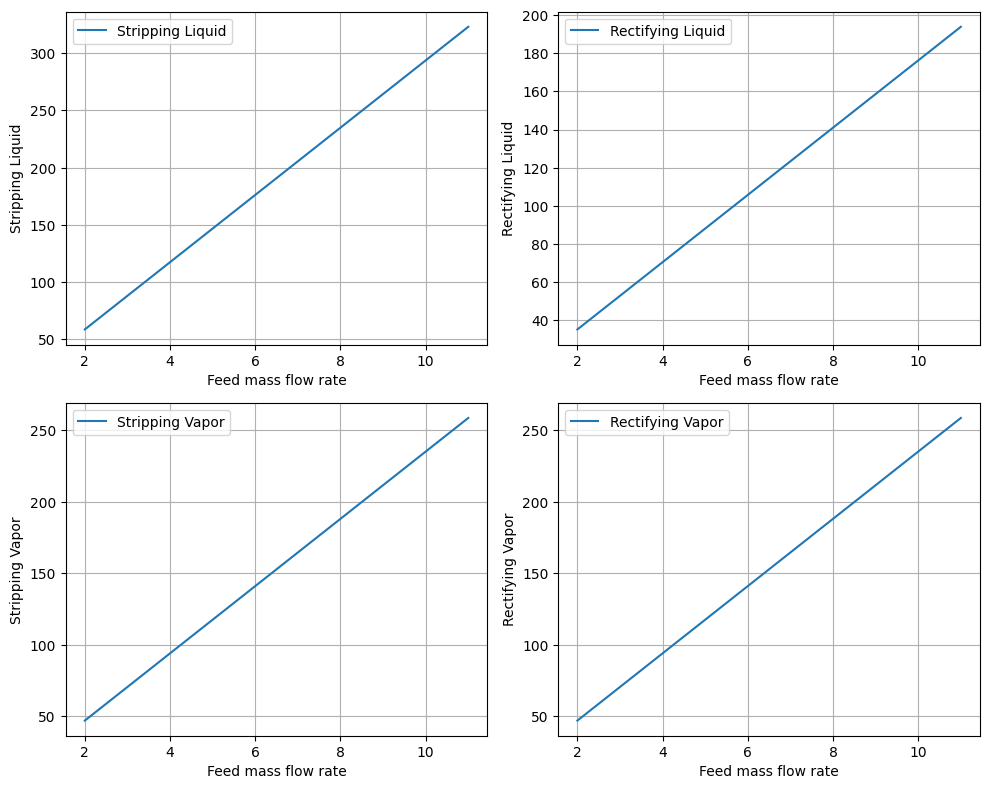

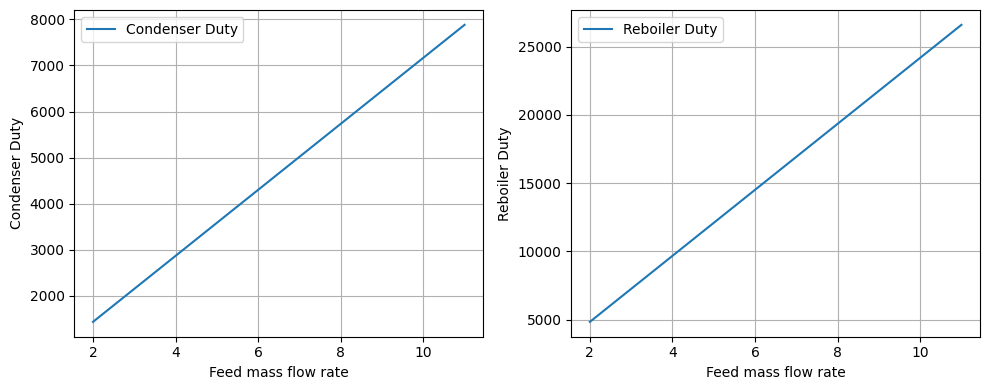

In [69]:
import matplotlib.pyplot as plt

# Extract the data from the results list
feed_mass_flow_rates = [row[0] for row in results]
reflux_ratios = [row[1] for row in results]
actual_stages = [row[2] for row in results]
optimal_feed_stages = [row[3] for row in results]
stripping_liquid = [row[4] for row in results]
stripping_vapor = [row[5] for row in results]
rectify_liquid = [row[6] for row in results]
rectify_vapor = [row[7] for row in results]
condenser_duty = [row[8] for row in results]
reboiler_duty = [row[9] for row in results]

# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(feed_mass_flow_rates, stripping_liquid, label='Stripping Liquid')
axs[0, 0].set_xlabel('Feed mass flow rate')
axs[0, 0].set_ylabel('Stripping Liquid')
axs[0, 0].legend()
axs[0, 0].grid()

axs[0, 1].plot(feed_mass_flow_rates, rectify_liquid, label='Rectifying Liquid')
axs[0, 1].set_xlabel('Feed mass flow rate')
axs[0, 1].set_ylabel('Rectifying Liquid')
axs[0, 1].legend()
axs[0, 1].grid()

axs[1, 0].plot(feed_mass_flow_rates, stripping_vapor, label='Stripping Vapor')
axs[1, 0].set_xlabel('Feed mass flow rate')
axs[1, 0].set_ylabel('Stripping Vapor')
axs[1, 0].legend()
axs[1, 0].grid()

axs[1, 1].plot(feed_mass_flow_rates, rectify_vapor, label='Rectifying Vapor')
axs[1, 1].set_xlabel('Feed mass flow rate')
axs[1, 1].set_ylabel('Rectifying Vapor')
axs[1, 1].legend()
axs[1, 1].grid()

plt.tight_layout()
plt.show()

# Plotting the condenser and reboiler duties
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(feed_mass_flow_rates, condenser_duty, label='Condenser Duty')
axs[0].set_xlabel('Feed mass flow rate')
axs[0].set_ylabel('Condenser Duty')
axs[0].legend()
axs[0].grid()

axs[1].plot(feed_mass_flow_rates, reboiler_duty, label='Reboiler Duty')
axs[1].set_xlabel('Feed mass flow rate')
axs[1].set_ylabel('Reboiler Duty')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

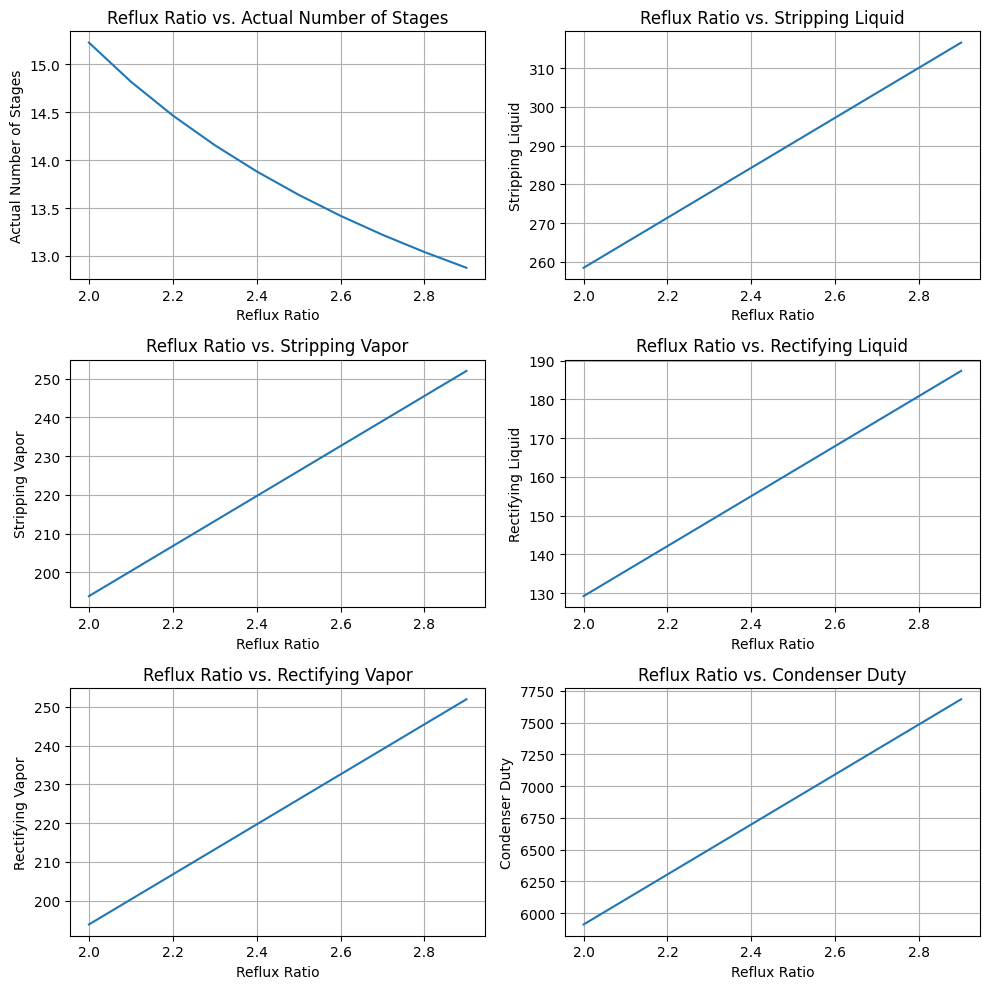

In [70]:
import matplotlib.pyplot as plt

# Set the initial mass flow rate
Feed_mass_flow = float(input("Enter the initial mass flow rate: "))

# Set the initial reflux ratio
Reflux_ratio = float(input("Enter the initial reflux ratio: "))

# Set the iterative step
iterative_step = float(input("Enter the iterative step: "))

# Set the number of loops
num_loops = int(input("Enter the number of loops: "))

# Set the solver mode to use the default solver
Settings.SolverMode = 0

# Create empty lists to store the results
reflux_ratios = []
actual_stages = []
stripping_liquid = []
stripping_vapor = []
rectifying_liquid = []
rectifying_vapor = []
condenser_duty = []
reboiler_duty = []

# Iterate for the specified number of loops
for i in range(num_loops):
    # Set the new reflux ratio
    SC.m_refluxratio = Reflux_ratio
    
    # Calculate the flowsheet
    errors = interf.CalculateFlowsheet2(sim)
    
    # Get the new flash spec and pressure
    Mass_Flow_Feed = Feed.GetMassFlow()
    Refluxratio = SC.m_refluxratio
    Actual_Number_of_Stages = SC.m_N
    Optimal_Feed_Stage = SC.m_Nmin
    Stripping_Liquid = SC.L_
    Rectify_Liquid = SC.L
    Stripping_Vapor = SC.V_
    Rectify_Vapor = SC.V
    Condenser_Duty = SC.m_Qc
    Reboiler_Duty = SC.m_Qb

    # Append the results to the lists
    reflux_ratios.append(Reflux_ratio)
    actual_stages.append(Actual_Number_of_Stages)
    stripping_liquid.append(Stripping_Liquid)
    stripping_vapor.append(Stripping_Vapor)
    rectifying_liquid.append(Rectify_Liquid)
    rectifying_vapor.append(Rectify_Vapor)
    condenser_duty.append(Condenser_Duty)
    reboiler_duty.append(Reboiler_Duty)

    # Increase the reflux ratio by the iterative step for the next iteration
    Reflux_ratio += iterative_step

# Create subplots for all the plots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Plot reflux ratio vs. actual number of stages
axs[0, 0].plot(reflux_ratios, actual_stages)
axs[0, 0].set_xlabel('Reflux Ratio')
axs[0, 0].set_ylabel('Actual Number of Stages')
axs[0, 0].set_title('Reflux Ratio vs. Actual Number of Stages')
axs[0, 0].grid()

# Plot reflux ratio vs. stripping liquid
axs[0, 1].plot(reflux_ratios, stripping_liquid)
axs[0, 1].set_xlabel('Reflux Ratio')
axs[0, 1].set_ylabel('Stripping Liquid')
axs[0, 1].set_title('Reflux Ratio vs. Stripping Liquid')
axs[0, 1].grid()

# Plot reflux ratio vs. stripping vapor
axs[1, 0].plot(reflux_ratios, stripping_vapor)
axs[1, 0].set_xlabel('Reflux Ratio')
axs[1, 0].set_ylabel('Stripping Vapor')
axs[1, 0].set_title('Reflux Ratio vs. Stripping Vapor')
axs[1, 0].grid()

# Plot reflux ratio vs. rectifying liquid
axs[1, 1].plot(reflux_ratios, rectifying_liquid)
axs[1, 1].set_xlabel('Reflux Ratio')
axs[1, 1].set_ylabel('Rectifying Liquid')
axs[1, 1].set_title('Reflux Ratio vs. Rectifying Liquid')
axs[1, 1].grid()

# Plot reflux ratio vs. rectifying vapor
axs[2, 0].plot(reflux_ratios, rectifying_vapor)
axs[2, 0].set_xlabel('Reflux Ratio')
axs[2, 0].set_ylabel('Rectifying Vapor')
axs[2, 0].set_title('Reflux Ratio vs. Rectifying Vapor')
axs[2, 0].grid()

# Plot reflux ratio vs. condenser duty
axs[2, 1].plot(reflux_ratios, condenser_duty)
axs[2, 1].set_xlabel('Reflux Ratio')
axs[2, 1].set_ylabel('Condenser Duty')
axs[2, 1].set_title('Reflux Ratio vs. Condenser Duty')
axs[2, 1].grid()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

### Saving the file

In [71]:
# saving the modified version of file at same path

fileNameToSave = Path.Combine(Environment.GetFolderPath(Environment.SpecialFolder.Desktop), r"D:\08 Linked In\03 DWSim Automation\04 Automation of Column\00 Modified_flowsheet.dwxmz")

interf.SaveFlowsheet(sim, fileNameToSave, True)

#### Disclamer

The exercise done was to understand how automation can be used for Shortcut Column in DWSim. It does not contains any process data from a live plant under operating conditions but yes the same can be replicated if customer data is available